<font style="font-size:36pt">Hierarchical Clustering

# 1. Agglomerative 

## - Bottom up approach
## - Treat each cell as a cluster
## - Combine clusters based on a "nearest cluster" metric
## - AGNES = AGglomerative NESting Algorithm

# 2. Divisive

## - Top down approach
## - Start with a single cluster
## - Divide into smaller clusters
## - DIANA = DIvisive ANAlysis Clustering Algorithm

  
  <font style="font-size:72pt">
    
    

<font style="font-size:32pt">Sample Distance Metrics

## 1. Euclidean L2 Metric $$d(\bf{p},\bf{q})=\sqrt{\sum (p_i-q_i)^2}$$

## 2. Manhattan L1 Metric $$d(\bf{p},\bf{q}) = \sum |p_i-q_i|$$

## 3. Mahalanobis Metric (Multivariate Normal) $$d({p},{q}) = \sqrt{({p}-{q})^\text{T}{S}^{-1}({p}-{q})}$$ where $S$ is a covariance matrix

<font style="font-size:48pt"><p>
    

<font style="font-size:36pt">Typical Linkage Measures

## Let $A$, $B$ be clusters and $p$, $q$ be points

## 1. Single Link
## $$L(A,B)=\min\{d({p},{q})|\forall {p}\in A, {q}\in B\}$$

## 2. Complete Link
## $$ L(A,B)=\max\{d({p},{q})|\forall {p}\in A, {q}\in B\}$$

## 3. Group Average 
## $$L(A,B) = \displaystyle{\dfrac{1}{|A||B|}\sum_{{p}\in A, {q}\in B} d({p},{q})}$$
## where $|C|$ means the number of points in cluster $C$. 

## This gives an average distance between the points in $A$ and $B$

## 4. Mean Distance
## $$L(A, B) = \displaystyle{
d\bigg(
\dfrac{1}{|A|}\sum_{{p}\in A}{p},
\dfrac{1}{|B|}\sum_{{p}\in B}{p}
\bigg)
}$$

## This gives the distance between the centroids of $A$ and $B$.

## 5. Ward Minimum Variance Method
## $$\displaystyle{L(A,B)=
\dfrac{|A||B|}{|A| + |B|}\bigg[L_2
\bigg(
\dfrac{1}{|A|}\sum_{{p}\in A}{p} - \dfrac{1}{|B|}\sum_{{p}\in B}{p}
\bigg)\bigg]^2}$$
## where
## $$L_2({p})=\sqrt{\sum p_i^2}$$

<font style="font-size:36pt">A Worked Example

## We'll arbitrarily make up a collection of 5 points to demonstrate the ideas

### Put the points into a matrix toydata and plot them for illustration

  x   y
P 1 1.5
Q 1 2.0
R 2 2.5
S 4 3.0
T 4 4.0


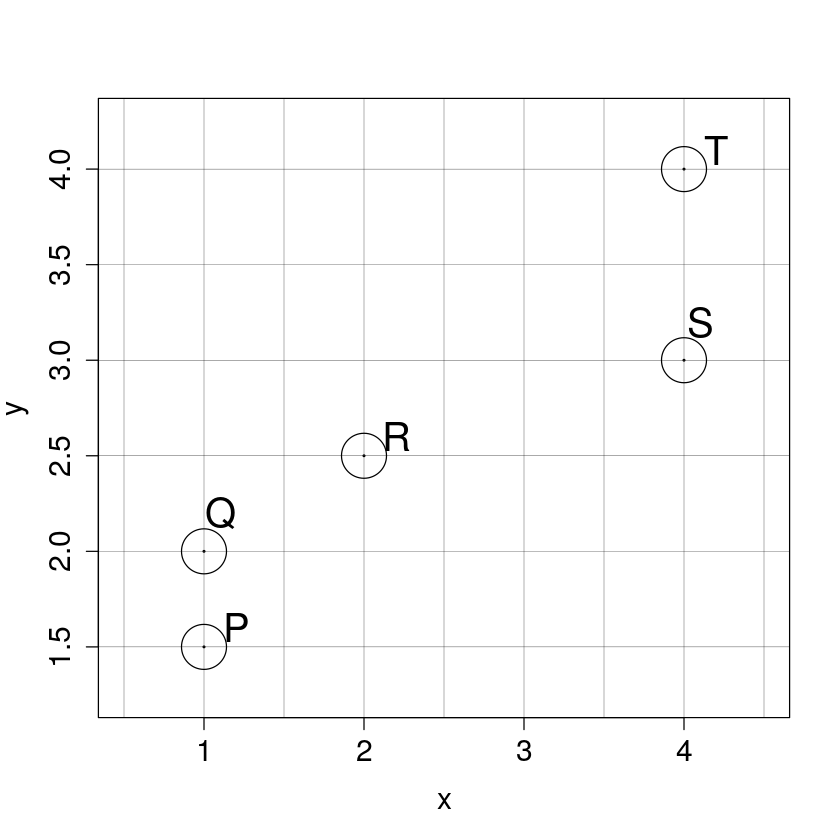

In [1]:
#
# list of points
#
toydata=matrix(c(1,1.5,1,2,2,2.5,4,3,4,4),ncol=2,byrow=TRUE)
colnames(toydata)=c("x","y")
#
# name the points
#
rownames(toydata)=c("P","Q","R","S","T")
#
# print the table
#
print(toydata)
# 
# plot the points
#pdf("agnes-data-example.pdf")
plot(toydata[,1],toydata[,2],ylim=c(1.25,4.25),xlim=c(0.5,4.5),
    cex=5,  # use really big circles for points
    xlab="x",ylab="y",
    cex.axis=1.5,cex.lab=1.5 # use moderatively big font for axis labels
    )
#
# mark centers of points with little tiny dots
#
points(toydata[,1],toydata[,2],cex=0.2) 
#
# put labels next to the points
#
text(toydata+c(.2,.1),labels=rownames(toydata),cex=2)
#
# use abline to draw gridline

abline(h=seq(.5,4.5,by=.5),  # horizontal gridline
       v=seq(.5,4.5,by=.5),  # vertical gridline
       lwd=.25)  # .25 point line weight
#dev.off()

## Figure out the distance between all the points

In [2]:
round(dist(toydata),2)

     P    Q    R    S
Q 0.50               
R 1.41 1.12          
S 3.35 3.16 2.06     
T 3.91 3.61 2.50 1.00

## The nearest two points are P and Q
## They form the first cluster
## We'll call it PQ, its center is at (1, 1.75)

## Make a list of the new cluster centers

In [3]:
newclusters=rbind(c(1,1.75),toydata)
rownames(newclusters)=c("PQ", "P","Q","R","S","T")
newclusters=newclusters[-c(2,3),]
newclusters

,x,y
PQ,1,1.75
R,2,2.50
S,4,3.00
T,4,4.00


## Find the distance between all the new cluster centers

In [4]:
round(dist(newclusters),2)

    PQ    R    S
R 1.25          
S 3.25 2.06     
T 3.75 2.50 1.00

## The nearest two clusters are (the points) S and T
## make a new cluster ST from these points
## Our clusters are (P,Q), R, (S,T)
## The new cluster center is at (4,3.5); make a new list

In [5]:
newerclusters=rbind(c(4,3.5),newclusters)
rownames(newerclusters)=c("ST","PQ","R","S","T")
newerclusters=newerclusters[-c(4,5),]
newerclusters

,x,y
ST,4,3.50
PQ,1,1.75
R,2,2.50


## Find the distances between all the new clusters

In [6]:
dist(newerclusters)

         ST       PQ
PQ 3.473111         
R  2.236068 1.250000

## The closests clusters are R and (P,Q)
## Make a new cluster (R, (P,Q)). 
## There are only two clusters left, (S,T) and (R, (P, Q)), bind them
## The final result is ((S,T), (R, (P,Q))

# Jumping ahead to visualize a dendrogram ...

In [7]:
library(cluster)

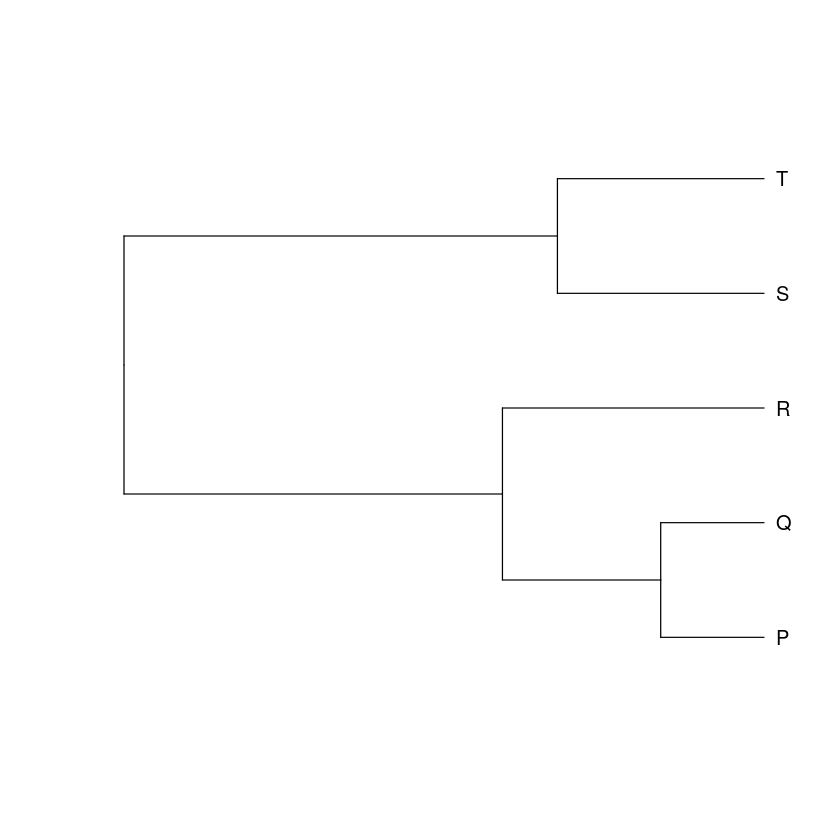

In [8]:
plot(as.dendrogram(agnes(toydata)),xlab="",axes=FALSE,horiz=TRUE)

<font style="font-size:36pt">AGNES, with Cars93 from MASS

In [106]:
library(MASS)

In [107]:
dset=Cars93
head(dset,5)
colnames(dset)

Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


[1] "Manufacturer"       "Model"             
 [3] "Type"               "Min.Price"         
 [5] "Price"              "Max.Price"         
 [7] "MPG.city"           "MPG.highway"       
 [9] "AirBags"            "DriveTrain"        
[11] "Cylinders"          "EngineSize"        
[13] "Horsepower"         "RPM"               
[15] "Rev.per.mile"       "Man.trans.avail"   
[17] "Fuel.tank.capacity" "Passengers"        
[19] "Length"             "Wheelbase"         
[21] "Width"              "Turn.circle"       
[23] "Rear.seat.room"     "Luggage.room"      
[25] "Weight"             "Origin"            
[27] "Make"

In [108]:
options(width=60)
print(dset[5,])

  Manufacturer Model    Type Min.Price Price Max.Price
5          BMW  535i Midsize      23.7    30      36.2
  MPG.city MPG.highway     AirBags DriveTrain Cylinders
5       22          30 Driver only       Rear         4
  EngineSize Horsepower  RPM Rev.per.mile Man.trans.avail
5        3.5        208 5700         2545             Yes
  Fuel.tank.capacity Passengers Length Wheelbase Width
5               21.1          4    186       109    69
  Turn.circle Rear.seat.room Luggage.room Weight  Origin
5          39             27           13   3640 non-USA
      Make
5 BMW 535i


# Easier to Demonstrate wtih All Numerical Data. We will:

## 1. Remove categorical columns (could convert to numerical)
## 2. Label Rows with column "Make"
## 3. Remove Column "Make"

In [109]:
dset=dset[-c(1,2)]
row.names(dset)=dset[,"Make"]
dset$Type=NULL
dset$AirBags=NULL
dset$DriveTrain=NULL
dset$Man.trans.avail=NULL
dset$Make=NULL
dset$Origin=NULL
head(dset,5)

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Acura Integra,12.9,15.9,18.8,25,31,4,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11,2705
Acura Legend,29.2,33.9,38.7,18,25,6,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15,3560
Audi 90,25.9,29.1,32.3,20,26,6,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14,3375
Audi 100,30.8,37.7,44.6,19,26,6,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17,3405
BMW 535i,23.7,30.0,36.2,22,30,4,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13,3640


In [111]:
print(dset[5,])

         Min.Price Price Max.Price MPG.city MPG.highway
BMW 535i      23.7    30      36.2       22          30
         Cylinders EngineSize Horsepower  RPM Rev.per.mile
BMW 535i         4        3.5        208 5700         2545
         Fuel.tank.capacity Passengers Length Wheelbase
BMW 535i               21.1          4    186       109
         Width Turn.circle Rear.seat.room Luggage.room
BMW 535i    69          39             27           13
         Weight
BMW 535i   3640


## load library and perform clustering with agnes

In [ ]:
#library(cluster)

In [12]:
ag=agnes(dset)

## make dendrogram plot

In [113]:
#
# optimal window size is screen dependent
#
options(repr.plot.width=6, repr.plot.height=16)
#
# optimal margin settings are screen dependent
#
par(mar=c(3,4,1,8))
#
# build the tree and plot it
#
dag = as.dendrogram(ag)
pdf("dend-cars-agnes.pdf",height=12,width=6)
#
par(cex=.75) # set font size
plot(dag,horiz=TRUE,axes=FALSE)
#
dev.off()

png 
  2

## Make a circular denrogram

In [76]:
#install.packages("dendextend")
library(dendextend)

In [78]:
#install.packages("circlize")
library(circlize)

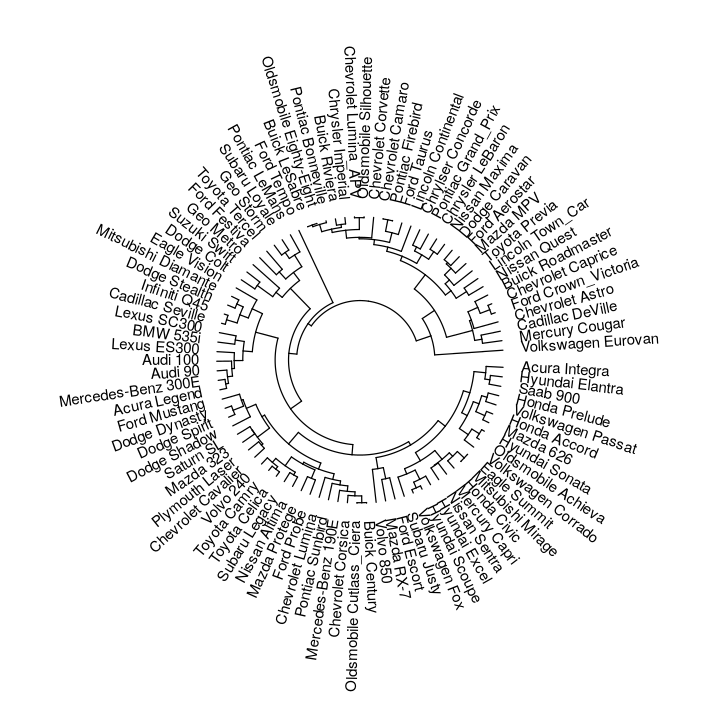

In [65]:
options(repr.plot.width=6, repr.plot.height=6)
#pdf("circ-den-cars-agnes.pdf")
par(cex=.75)
#
# generally need to manually adjust the parameters
# based on how long the label names are to avoid
# clipping the label names
#
circlize_dendrogram(dag,
    labels_track_height=.5, # prop. of space for labels
    dend_track_height=.3)   # prop of space for tree
#dev.off()

<font style="font-size:36pt">DIANA Clustering

In [79]:
dcl=diana(dset)

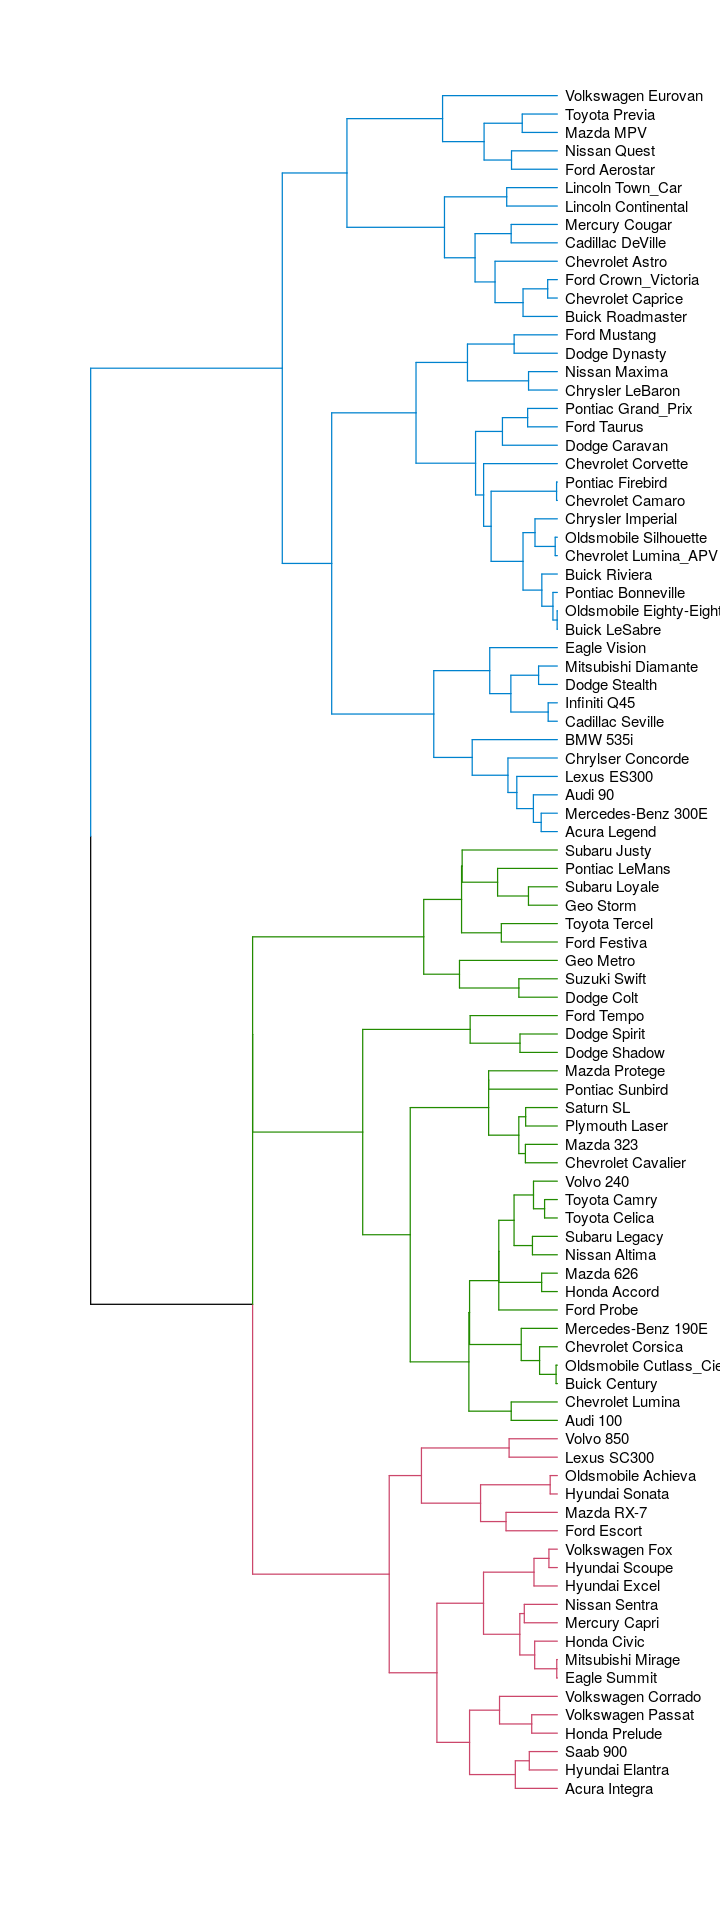

In [87]:
#
# optimal window size is screen dependent
#
options(repr.plot.width=6, repr.plot.height=16)
#
# optimal margin settings are screen dependent
#
par(mar=c(3,4,1,8))
#
# build the tree and plot it
#
ddcl = as.dendrogram(dcl)


ddcl= color_branches(ddcl, k=3)


#pdf("dend-cars-agnes.pdf",height=6,width=12)
#
par(cex=.75) # set font size
plot(ddcl,horiz=TRUE,axes=FALSE)
#
#dev.off()

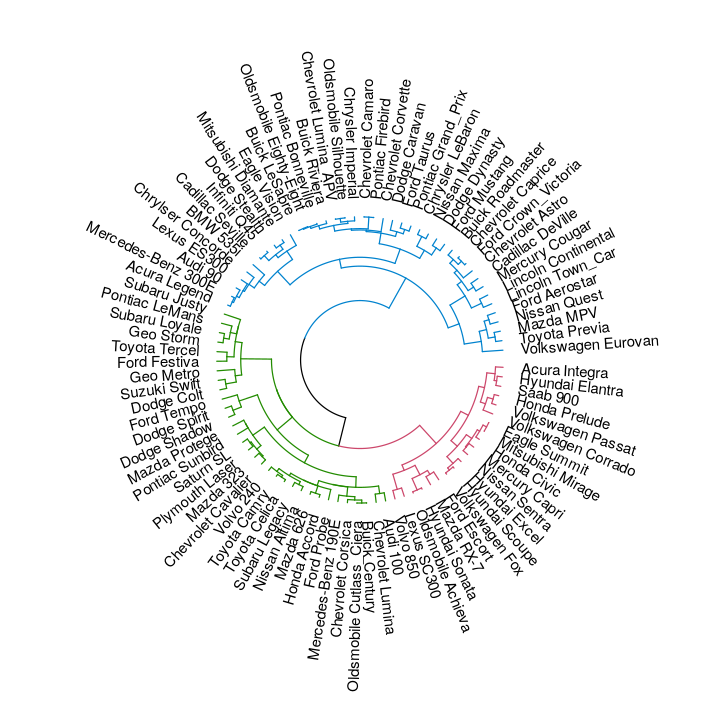

In [115]:
options(repr.plot.width=6, repr.plot.height=6)
#pdf("circ-den-cars-diana.pdf")
par(cex=.75)
#
# generally need to manually adjust the parameters
# based on how long the label names are to avoid
# clipping the label names
#
circlize_dendrogram(ddcl,
    labels_track_height=.5, # prop. of space for labels
    dend_track_height=.3)   # prop of space for tree
#dev.off()

# build a tanglegram

In [90]:
cdag=color_branches(dag,k=3)

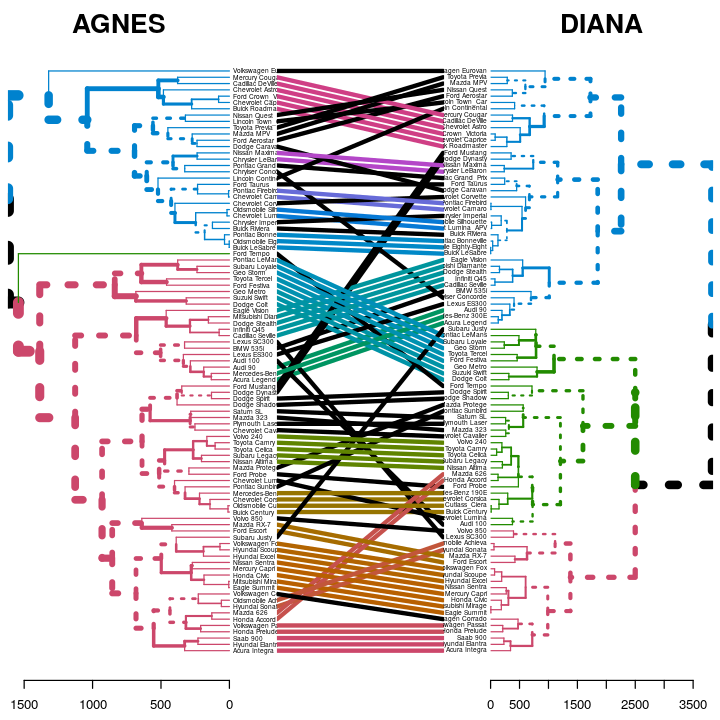

In [100]:
#pdf("AGNES-DIANA-tanglegram.pdf")
tanglegram(cdag,ddcl, main_left="AGNES",main_right="DIANA",lab.cex=0.5)
#dev.off()

# FM (Fowlkes/Mallows) Index

## $$FM=\sqrt{\dfrac{TP}{TP+FP} \dfrac{TP}{TP+FN}}$$

- ## TP = Count of pairs of points in same cluster in A and B
- ## FP = Count of pairs of points in same cluster in A but not in B
- ## FN = Count of pairs of points in same cluster in B but not in A
- ## (TN = Count of pairs of points that are different in both A and B is not part of this measure)

- ## It does not matter which tree is A and which is B because the formula is symmetric

## Identical clustering give an FM index of 1

In [143]:
FM_index(cutree(dag,5),cutree(dag,5))

[1] 1
attr(,"E_FM")
[1] 0.442029
attr(,"V_FM")
[1] 0.0003132425

In [154]:
FM=function(A, B, j){
    FM_index(cutree(A,j),cutree(B,j))}
FM.INDEX=function(j){FM(dag,ddcl,j)}

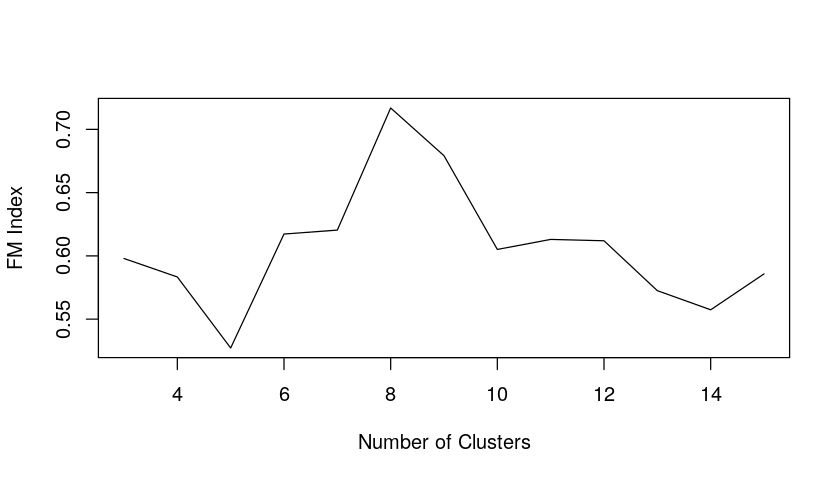

In [156]:
options(repr.plot.width=7, repr.plot.height=4)
#pdf("FM-Index-agnes-diana-car93.pdf",width=7,height=4)
plot(3:15, sapply(3:15,FM.INDEX),type="l",
     xlab="Number of Clusters",
     ylab="FM Index")
#dev.off()

In [136]:
sapply(c(1,2,3,4),sqrt)

[1] 1.000000 1.414214 1.732051 2.000000